In [1]:
from kid_readout.utils import readoutnc
from kid_readout.analysis import noise_measurement, plot_resonator, noise_fit
plt.rcParams['font.size'] = 11
from kid_readout.measure import measurement, nc
from kid_readout.measure.load import stream_from_rnc, sweep_from_rnc, sweepstream_from_rnc

updated file list


/home/local/lib/python2.7/site-packages/matplotlib/__init__.py:1155: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
current_nc = '/data/readout/2015-05-11_150346_compressor_noise_60_s.nc'

In [3]:
rnc = readoutnc.ReadoutNetCDF(current_nc)

In [4]:
channel=1
on_index = 0
off_index = 1

In [5]:
len(rnc.sweeps)

2

In [6]:
len(rnc.timestreams)

2

In [7]:
s_off = rnc.sweeps[off_index]
t_off = rnc.timestreams[off_index]
s_on = rnc.sweeps[on_index]
t_on = rnc.timestreams[on_index]

In [8]:
t_off.data.shape

(16, 1048576)

In [9]:
t_off.measurement_freq

array([  96.06689453,  101.96484375,  108.8671875 ,  112.26489258,
        117.27490234,  127.7890625 ,  195.71704102,  188.86694336,
        184.55859375,  178.94555664,  174.95996094,  165.41259766,
        164.37890625,  164.08764648,  148.24975586,  144.19262695])

In [10]:
t_off.measurement_freq.argsort()

array([ 0,  1,  2,  3,  4,  5, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6])

In [11]:
frequencies_per_index = 31

In [12]:
s_off.frequency[::frequencies_per_index]

array([  96.05834961,  101.95605469,  108.85839844,  112.25634766,
        117.26611328,  127.78051758,  144.18383789,  148.24121094,
        164.07910156,  164.37036133,  165.40405273,  174.95166016,
        178.93701172,  184.55004883,  188.85839844,  195.70825195])

In [13]:
s_off.timestream_group.measurement_freq[::frequencies_per_index]

array([  96.05834961,  101.95605469,  108.85839844,  112.25634766,
        117.26611328,  127.78051758,  144.18383789,  148.24121094,
        164.07910156,  164.37036133,  165.40405273,  174.95166016,
        178.93701172,  184.55004883,  188.85839844,  195.70825195])

In [14]:
np.unique(s_off.index)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15], dtype=int32)

In [15]:
s_off.frequency.size / 16 == int(31)

True

In [16]:
s1_on = stream_from_rnc(rnc, on_index, 1)

In [17]:
s1_off = stream_from_rnc(rnc, off_index, 1)

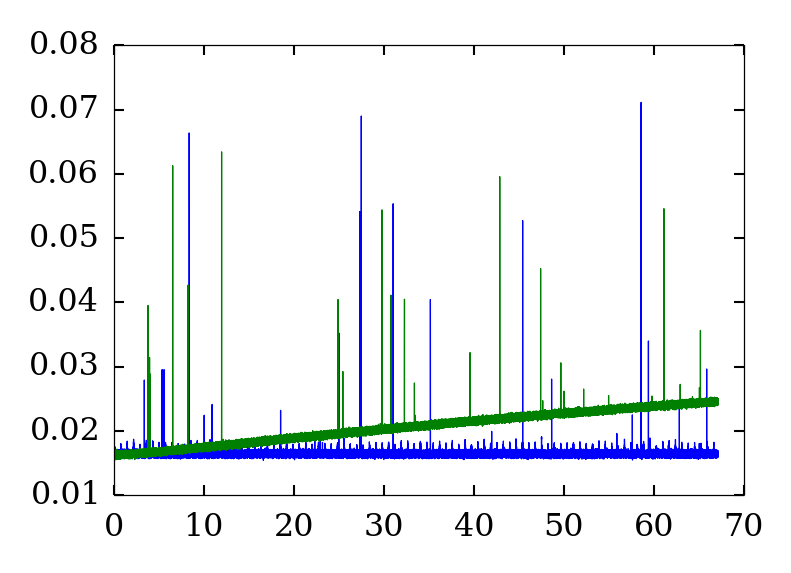

In [18]:
plt.plot(s1_on.epoch - s1_on.epoch.min(), abs(s1_on.s21))
plt.plot(s1_off.epoch - s1_off.epoch.min(), abs(s1_off.s21))

In [19]:
s1_on = sweep_from_rnc(rnc, on_index, 1)

In [20]:
s1_off = sweep_from_rnc(rnc, off_index, 1)

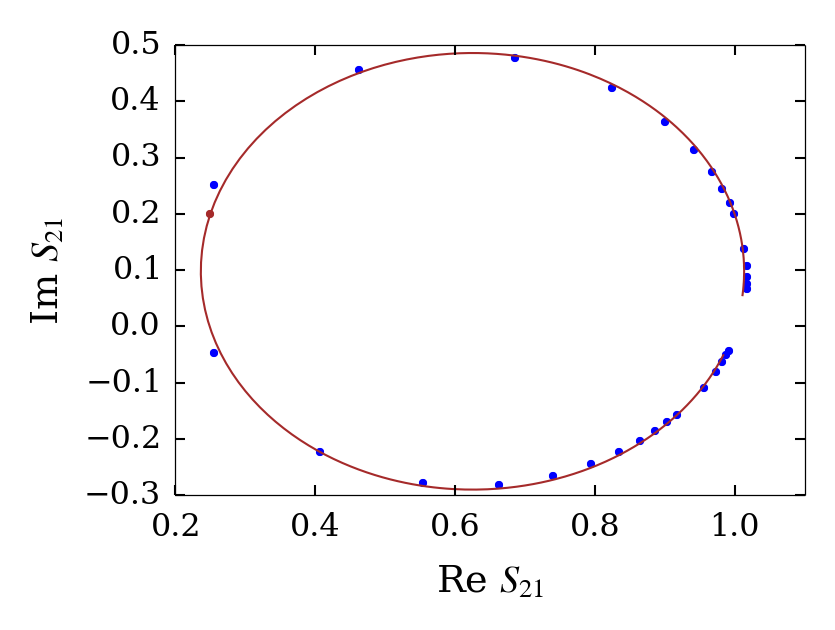

In [21]:
plot_resonator.IQ_circle(s1_on.resonator, normalize_s21=True);

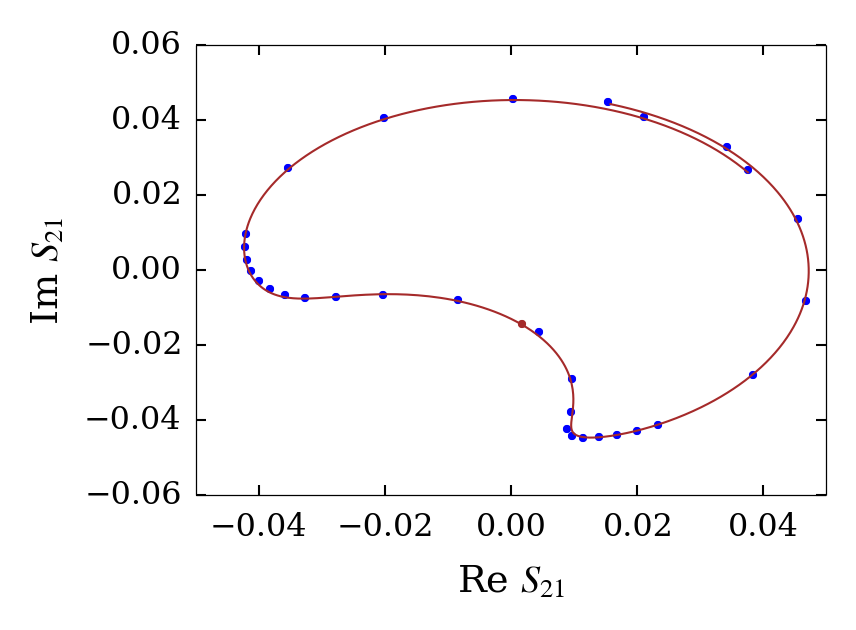

In [22]:
plot_resonator.IQ_circle(s1_off.resonator, normalize_s21=False);

In [23]:
ss_channel = 0
ss_on = sweepstream_from_rnc(rnc, sweep_index=on_index, stream_index=on_index, channel=ss_channel)
ss_off = sweepstream_from_rnc(rnc, sweep_index=off_index, stream_index=off_index, channel=ss_channel)

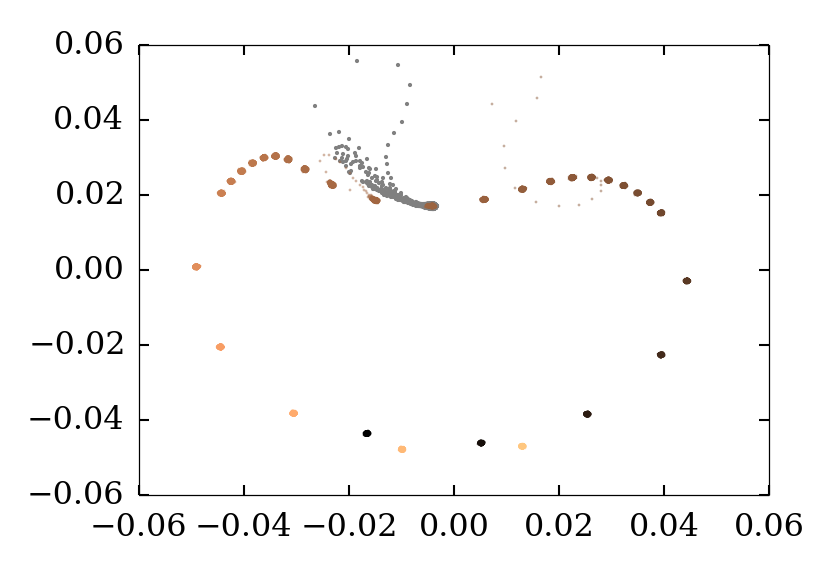

In [24]:
mappable = plt.cm.ScalarMappable(matplotlib.colors.Normalize(min(ss_on.sweep.frequency),
                                                             max(ss_on.sweep.frequency)),
                                 cmap=plt.cm.copper)
mappable.set_array(ss_on.sweep.frequency)
fig, ax = plt.subplots()
ax.plot(ss_on.stream.s21.real, ss_on.stream.s21.imag, '.', color='gray', ms=1)
for s in ss_on.sweep.streams:
    ax.plot(s.s21.real, s.s21.imag, '.', color=mappable.to_rgba(s.frequency), ms=0.2)

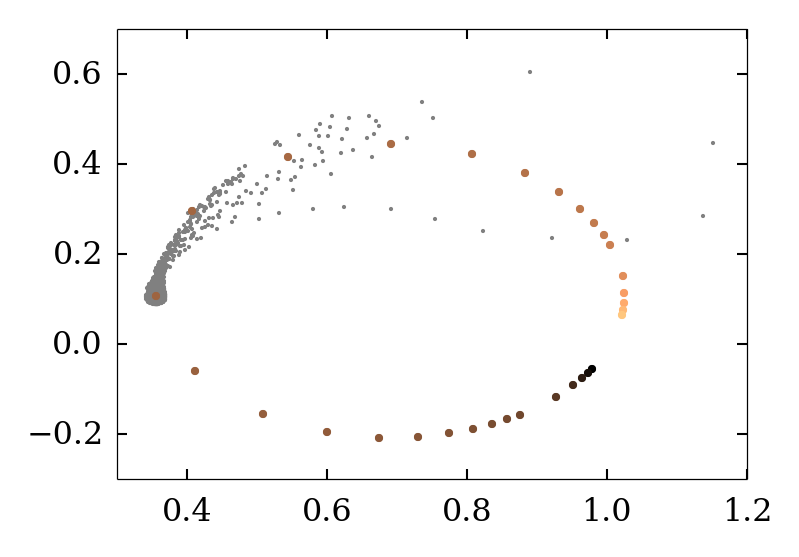

In [25]:
fig, ax = plt.subplots()
ax.plot(ss_on.stream_s21_normalized.real, ss_on.stream_s21_normalized.imag, '.', color='gray', ms=1)
for s21n, f in zip(ss_on.sweep_s21_normalized, ss_on.sweep.frequency):
    ax.plot(s21n.real, s21n.imag, '.', color=mappable.to_rgba(f))

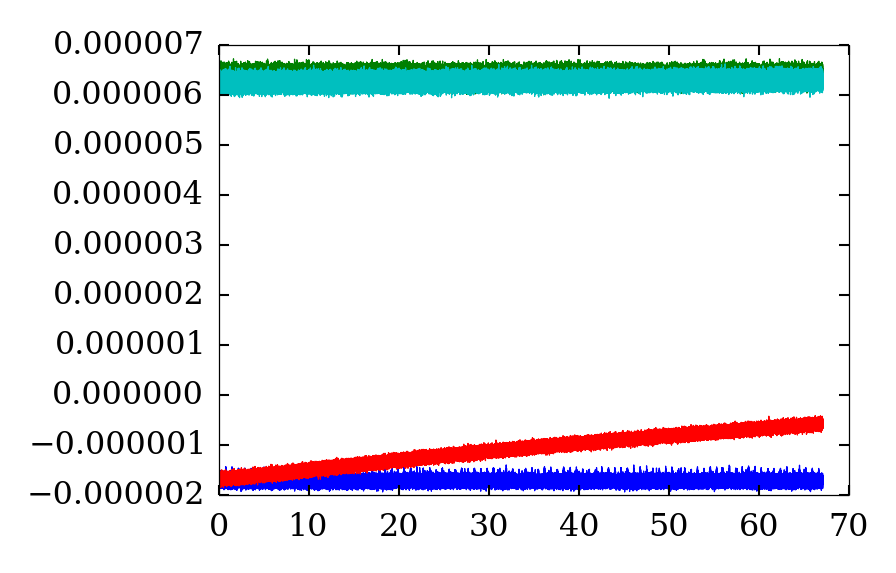

In [26]:
plt.plot(ss_on.stream.epoch - ss_on.stream.epoch.min(), ss_on.x)
plt.plot(ss_on.stream.epoch - ss_on.stream.epoch.min(), ss_on.i)
plt.plot(ss_off.stream.epoch - ss_off.stream.epoch.min(), ss_off.x)
plt.plot(ss_off.stream.epoch - ss_off.stream.epoch.min(), ss_off.i)

In [27]:
ss_on._set_psd_i_and_x(detrend=plt.mlab.detrend_linear)
ss_off._set_psd_i_and_x(detrend=plt.mlab.detrend_linear)

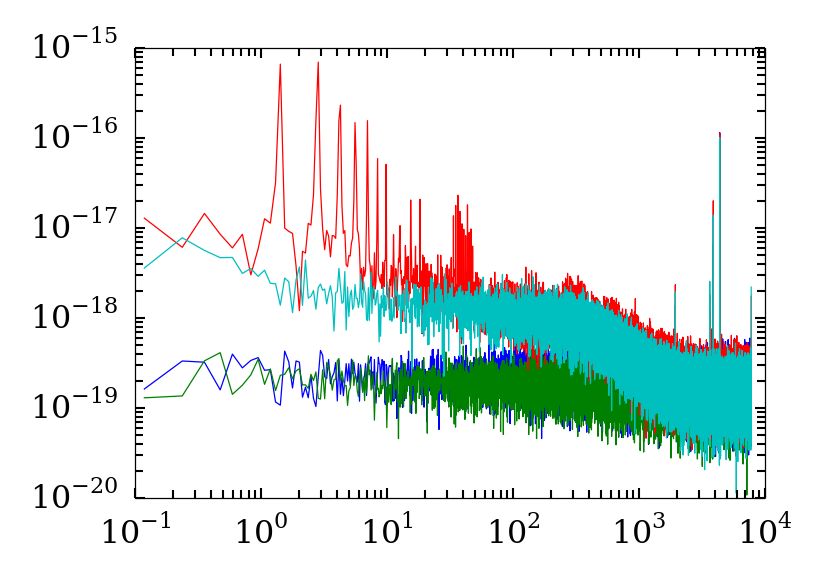

In [30]:
plt.loglog(ss_on.psd_frequency[1:], ss_on.psd_ii[1:] / 4)
plt.loglog(ss_off.psd_frequency[1:], ss_off.psd_ii[1:] / 4)
plt.loglog(ss_on.psd_frequency[1:], ss_on.psd_xx[1:])
plt.loglog(ss_off.psd_frequency[1:], ss_off.psd_xx[1:])
ff = np.logspace(-1, 4, 1e3);

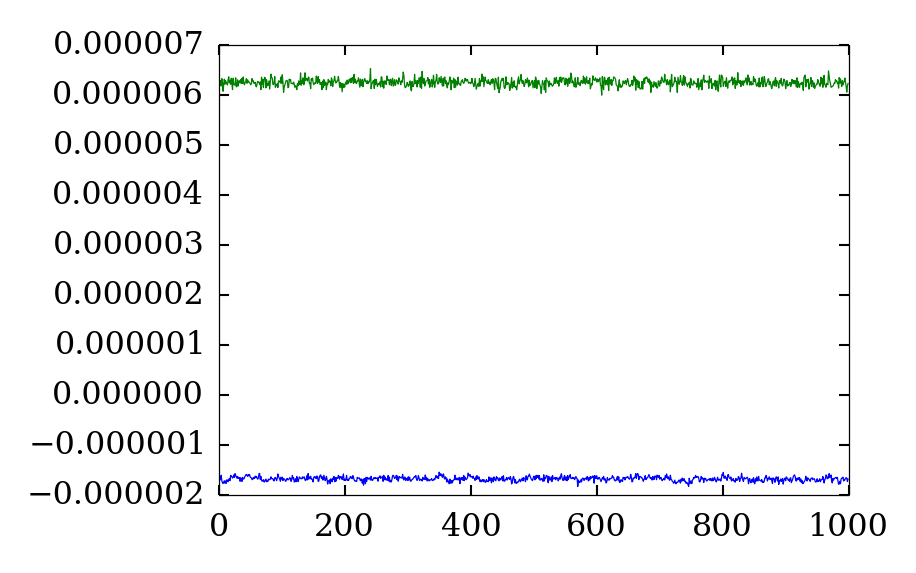

In [31]:
plt.plot(ss_off.x[:1e3])
plt.plot(ss_off.i[:1e3])

In [32]:
ss_on.state['string'] = 'Hello, world!'
ss_on.state['number'] = 5.3
ss_on.state['sequence'] = (3, 3)

In [33]:
rm /home/flanigan/data/test.nc

In [34]:
df = nc.DataFile('/home/flanigan/data/test.nc')

In [35]:
df.save_measurement(ss_on, name='SweepStream_on')
df.save_measurement(ss_off, name='SweepStream_off')

In [36]:
df.measurements

OrderedDict([('SweepStream_on', <netCDF4.Group object at 0x4049350>), ('SweepStream_off', <netCDF4.Group object at 0x402f650>)])

In [37]:
df.dataset.close()
df = nc.DataFile('/home/flanigan/data/test.nc')

In [38]:
ssl = measurement.SweepStream().from_group(df.measurements['SweepStream_on'])

In [39]:
ssl.state['number']

5.2999999999999998

In [40]:
ssl.state['string']

u'Hello, world!'

In [41]:
ssl.state['sequence']

array([3, 3])